# Breast Cancer Machine Learning Classification Analysis

## Executive Summary

Cancer is one of the leading causes of death in the world, and while there are treatments, there is no set cure for it. Among them, breast cancer is one of the most prevalent. While it does mainly affect women, men can be diagnosed with it too. The purpose of this project is to predict who may or may not have breast cancer based on a number of predictors. Libraries in R were used to aid in the process. Three techniques were used: ridge regularization, lasso regularization, and classification trees. Seeing which method produces the best results for specific outcomes is beneficial. For instance, doctors may be more concerned with the sensitivity assessment rather than the total accuracy. This is because one would not want to misdiagnose someone by saying they don't have cancer, when in reality they do. A high sensitivity means that the chance for a false positive rate is low. The results show that classification trees were slightly better when it came to sensitivity assessments, whereas the regression methods were better in predicting the total accuracy. 

## Data

The original data is from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29, the UCI machine learning repository website. The title is **Breast Cancer Wisconsin (Diagnostic)** by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian. The data used in this project is a cleaner version of the original, posted by user UCI Machine Learning. 

There are three types of categories in the data for the real-valued features. These are **mean**, **SE**, and **worst**. Each variable like this has each kind of these categories. For example, there is a mean radius, standard error radius, and worst radius; all are numerical. Taken from the attribute information from the original website, the following are all the variables:

- **ID number** 
- **Diagnosis** (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- **Radius** (mean of distances from center to points on the perimeter)
- **Texture** (standard deviation of gray-scale values)
- **Perimeter**
- **Area**
- **Smoothness** (local variation in radius lengths)
- **Compactness** (perimeter^2 / area - 1.0)
- **Concavity** (severity of concave portions of the contour)
- **Concave Points** (number of concave portions of the contour)
- **Symmetry**
- **Fractal Dimension** ("coastline approximation" - 1)

The goal is to accurately predict whether the variable **diagnosis** is benign or malignant.

## Methodology

First, the necessary packages must be installed. For ridge and lasso methods, we must install glmnet and pROC. The first one ensures we're able to perform logistic regression with regularization, and the second allows us to produce an ROC curve. Package dplyr should be loaded for data manipulation purposes as well. 

For the classification tree method, we only need to install the package tree. 

Ridge and lasso regression are somewhat similar to linear regression. The only difference is that the cost function is slightly different. Ridge regression includes the addition of a term that's equal to the sum of the squared coefficients, and then having that sum multiplied by term lambda. Lambda is the penalty term in this scenario; since the penalty term is added onto the normal cost function of ordinary linear regression, as lambda approaches 0, the ridge regression performs very similarly to linear regression. Lambda's function is to regularize the coefficients if they take on such large values, hence the penalty. Lasso regression has a different term added; instead, it has only the magnitude of the coefficients summed up, and then multiplied by lambda. This allows some features to be neglected entirely since it is now possible to have parameters with a value of zero, whereas in ridge regression values cannot be neglected, but can be very small and close to 0. This is why the lasso method is used as a variable selection method as well, with the acronym being **Least Absolute Shrinkage and Selection Operator**.

We must tune this hyperparameter lambda if one wants to have the best model. We must use the glmnet package for this reason, as it allows us to use cross-validation to search for the best model. The measurements used will be deviance, or  $D = -2\ln L(\beta)=2\ell(\beta)$, which can be thought as a measure that shows how much the model deviates from an ideal one, and MSE, or mean squared error. 

Plots for ridge regularization will then be created, one that shows the deviance on the y-axis, and the other showing the MSE for illustrative purposes. 

After creating training and test splits, we can see how well the tested model performs with an ROC curve illustration. ROC curves illustrate the accuracy of the model, and they also highlight how well the sensitivity is. Then, a correlation matrix will be created in order to see the proportions of how accurate the chosen model is. The chosen lambda is based off the 1se rule. This rule denotes that we want to choose a more parsimonious, or simple, model; therefore, choosing the lambda that's one standard error off, a value that's usually not so large, is a recommended practice.

Lastly, the proportions of the model associated with this lambda value will be assessed, with accuracies and sensitivities observed. The process will be repeated for lasso regression to determine if any significant difference is shown.



For classification trees, the idea of it has to do with minimizing the sum of the squared errors. For example, say you have two variables, and they represent two axes. Within this graph, there are various partitions. In order to minimize the sum of squared errors, and without computationally going through one by one, two large partitions are compared against each other. Then, the one with the lower value will be selected, and then that will be further partitioned. This process is continued until a region has no more than 5 observations, or if a certain stopping criteria is met. 

The full tree will most likely have an issue of overfitting. We must regularize this by choosing a subset of the full tree, one used to better reflect out-of-sample data. We must find an optimal value of alpha such that it minimized the cost function, which can be done by observing a cross-validated graph. Then, we will know the number of nodes required for this model. This process is called pruning. Proportions can be created afterwards, and comparisons can be made between this method and the ridge/lasso regularization methods. 

## Results

### Ridge Regularization

Load the necessary packages for logistic regression

In [1]:
library(glmnet) #For logistic regression
library(pROC) #For the ROC curve
library(dplyr) #For data manipulation

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:glmnet':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Load the data
cancer = read.csv('C:/Users/andre/Downloads/data.csv')
head(cancer)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


The last column contains rows of NA values, so we must drop the column.

In [3]:
cancer = select(cancer, -c(X)) #Using dplyr's select function

In [4]:
cancer = na.omit(cancer) #Omit any NA values

dim(cancer) #Sanity check. There should only be 32 variables

[1] 569  32

A random number was picked from 0 to 9999 using Google to ensure randomization. Then, we create training and test sets

In [5]:
set.seed(7315)
tr = sample(1:nrow(cancer), size = .75*nrow(cancer), replace = FALSE)
#75/25 split for training and testing data

train = cancer[tr,]
test = cancer[-tr,]

In [6]:
head(train) #Ensure that the data looks as expected.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
466,9113239,B,13.24,20.13,86.87,542.9,0.08284,0.12230,0.101000,0.02833,...,15.44,25.50,115.0,733.5,0.1201,0.56460,0.65560,0.1357,0.2845,0.12490
501,914862,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.06142,...,16.76,20.43,109.7,856.9,0.1135,0.21760,0.18560,0.1018,0.2177,0.08549
191,874858,M,14.22,23.12,94.37,609.9,0.10750,0.24130,0.198100,0.06618,...,15.74,37.18,106.4,762.4,0.1533,0.93270,0.84880,0.1772,0.5166,0.14460
341,89813,B,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.04223,...,16.67,21.51,111.4,862.1,0.1294,0.33710,0.37550,0.1414,0.3053,0.08764
180,873586,B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,...,13.63,16.15,86.7,570.7,0.1162,0.05445,0.02758,0.0399,0.1783,0.07319
340,89812,M,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.26780,0.48190,0.2089,0.2593,0.07738


In [7]:
#Creating variables for logistic regression

y = train$diagnosis
x = train[ ,!(names(train) %in% c("id",'diagnosis'))] #exclude ID and diagnosis

In [8]:
str(x)

'data.frame':	426 obs. of  30 variables:
 $ radius_mean            : num  13.2 15 14.2 14.4 12.8 ...
 $ texture_mean           : num  20.1 16.7 23.1 16.5 13.1 ...
 $ perimeter_mean         : num  86.9 98.7 94.4 94.2 81.3 ...
 $ area_mean              : num  543 689 610 641 509 ...
 $ smoothness_mean        : num  0.0828 0.0988 0.1075 0.0975 0.0874 ...
 $ compactness_mean       : num  0.1223 0.1364 0.2413 0.1139 0.0377 ...
 $ concavity_mean         : num  0.101 0.07721 0.1981 0.08007 0.00919 ...
 $ concave.points_mean    : num  0.0283 0.0614 0.0662 0.0422 0.0133 ...
 $ symmetry_mean          : num  0.16 0.167 0.238 0.191 0.147 ...
 $ fractal_dimension_mean : num  0.0643 0.0687 0.0754 0.0641 0.0613 ...
 $ radius_se              : num  0.281 0.372 0.286 0.349 0.289 ...
 $ texture_se             : num  0.814 0.842 2.11 0.771 0.99 ...
 $ perimeter_se           : num  3.37 2.3 2.11 2.68 1.78 ...
 $ area_se                : num  23.8 34.8 31.7 32.1 21.8 ...
 $ smoothness_se          : num  0.

All variables appear to be numeric. If categorical variables were in the data, they would have to be manipulated.

In [9]:
typeof(x)
typeof(y)

[1] "list"

[1] "integer"

Variable **x** must be a matrix first. Then, we create the plots of ridge regression.

In [10]:
x = model.matrix( ~ . , data=x)[,-1]
#We get rid of the first column since that will only be filled with 1's and not useful predictors

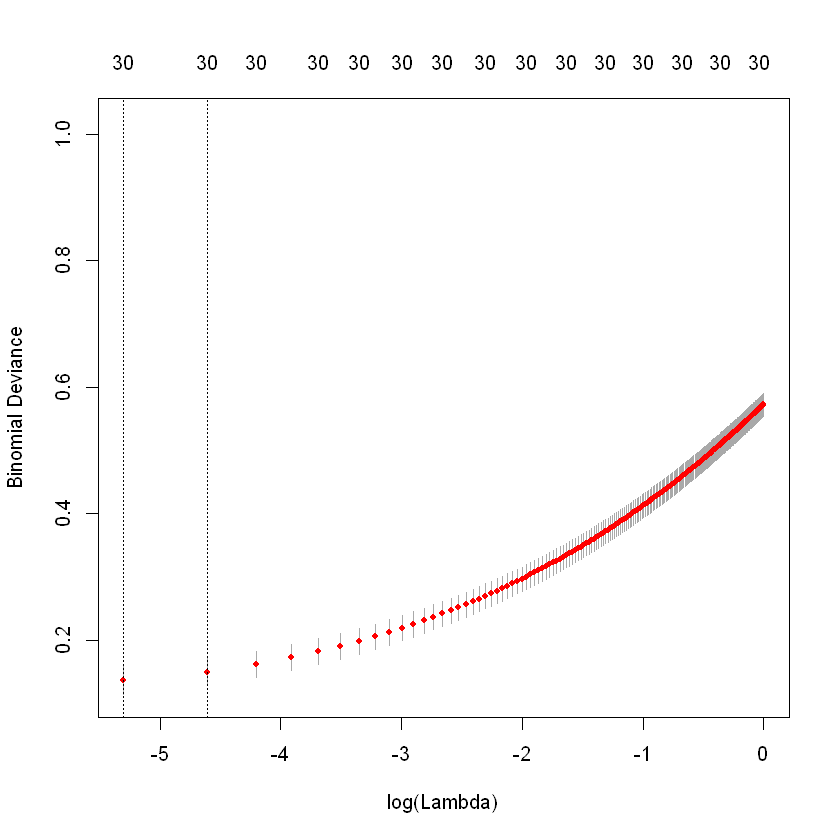

In [11]:
setLambda = seq(0,1,by=0.005) #To visualize all lambda values

fit = cv.glmnet(x, y, family='binomial', lambda=setLambda, type.measure='deviance', nfolds = 10, alpha = 0) 
#Cross-validating with 10 folds
#Ridge is 0, Lasso is 1 for alpha value

plot(fit)

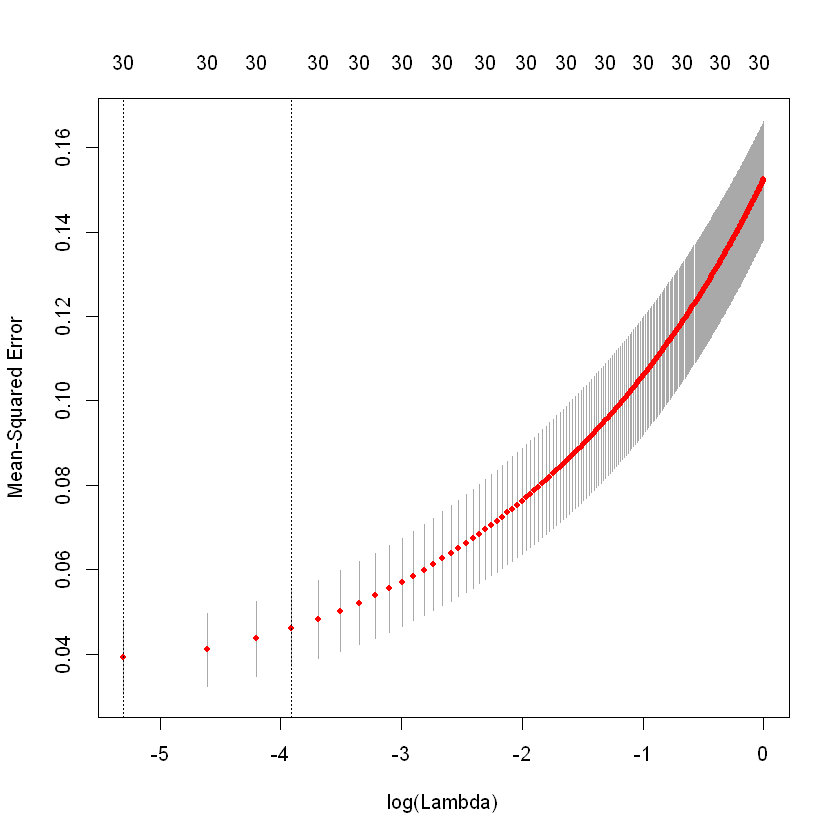

In [12]:
fit = cv.glmnet(x, y, family='binomial', lambda=setLambda, type.measure='mse', nfolds = 10, alpha = 0)
#using measure MSE instead


plot(fit)

From left to right, the two vertical lines show the minimum and 1se lambda value, respectively. It's recommended to use the 1se value since the minimum value will usually be too optimized for the in-sample data. Though we are increasing the error by just a small amount, we are making the model more pasrsimonious, or simple, for this small cost. It's a beneficial trade-off.

Next, let's examine the coefficients and parameters.

In [13]:
fit$lambda.min

[1] 0.005

In [14]:
fit$lambda.1se #the coef(fit) in the following cell uses this value

[1] 0.02

In [15]:
coef(fit)

31 x 1 sparse Matrix of class "dgCMatrix"
                                    1
(Intercept)             -1.991222e+01
radius_mean              1.230550e-01
texture_mean             1.017253e-01
perimeter_mean           1.738101e-02
area_mean                1.113960e-03
smoothness_mean          1.753469e+01
compactness_mean         9.985626e-01
concavity_mean           4.822614e+00
concave.points_mean      1.104247e+01
symmetry_mean            2.285326e+00
fractal_dimension_mean  -4.859386e+01
radius_se                1.460087e+00
texture_se              -1.982146e-01
perimeter_se             1.489836e-01
area_se                  6.780909e-03
smoothness_se            2.641856e+01
compactness_se          -1.260716e+01
concavity_se            -7.219166e-01
concave.points_se        2.079802e+01
symmetry_se             -2.629677e+01
fractal_dimension_se    -8.394284e+01
radius_worst             1.031453e-01
texture_worst            8.855754e-02
perimeter_worst          1.372855e-02
area_wor

As was discussed in the methodology section, the parameters are penalized for being too large at times. When they do get penalized, they never truly reach 0, but values very close to it. This is unlike lasso regularization, which will be shown in a moment.

Let's create the test set now. 25% of the data was randomized for this purpose.

In [16]:
y_test = test$diagnosis
x_test = test[, !(names(test) %in% c('id','diagnosis'))]

x_test = model.matrix( ~ ., data=x_test)[,-1]
pihat = predict(object=fit, newx = x_test, type='response') #using the ridge regression training data on the test set

#The following are used to ensure the results are what we expect.
length(pihat)/nrow(cancer) 
dim(x_test)

[1] 0.2513181

[1] 143  30

The above results look as expected. Now, we plot the ROC curve.

Setting levels: control = FALSE, case = TRUE
Warning message in roc.default(response = ylogical, predictor = pihat):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."Setting direction: controls < cases


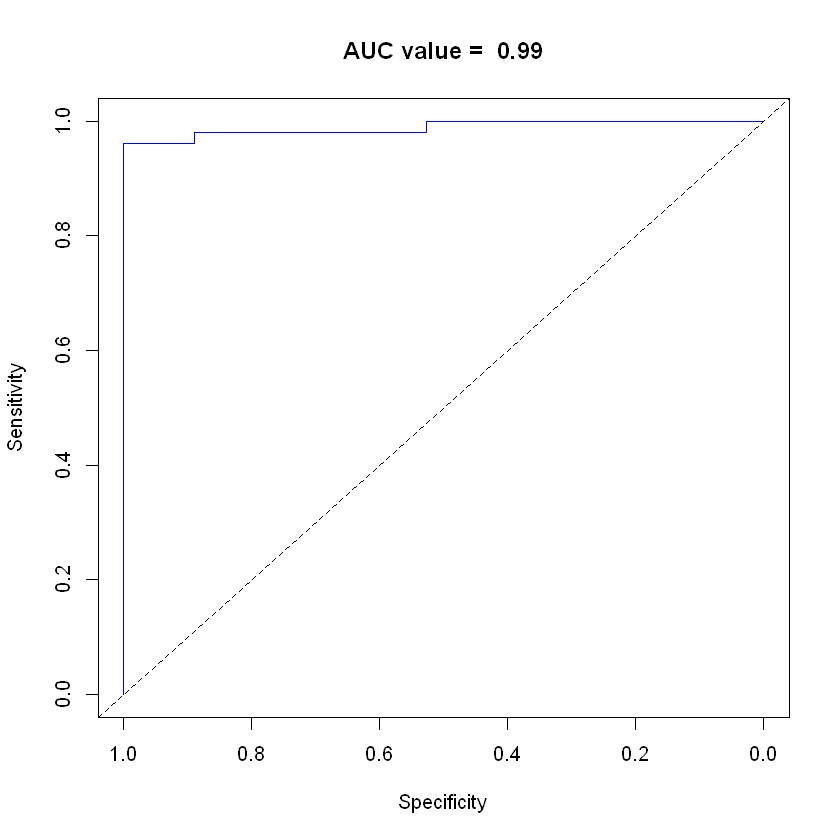

In [17]:
ylogical = (y_test == 'M') 
curveROC = roc(response = ylogical, predictor = pihat)
AUC = auc(curveROC)

plot(x = curveROC$specificities, y = curveROC$sensitivities, main=paste('AUC value = ',round(AUC,2)),
    xlab = 'Specificity', ylab = 'Sensitivity', xlim = c(1,0), type='l', col='blue')
abline(a=1,b=-1,lty="dashed") #the diagonal line

The above ROC curve is the closest to ideal that one may achieve. The diagonal line is not what we wish to emulate; the diagonal line is a result that has no predictive power. Essentially it means that specificity and sensitivity overlap so much that it is due to a 50/50 chance that one will test positive given they have the disease, or one will not test negative given they do not have the disease. The blue curve is what is desired. It illustrates that there is generally no overlap between sensitivity and specificity. Thus, the diagnosis is very, very good based on the AUC result, which measures how well the ROC curve fit is.

We'll examine the proportions next

In [18]:
yhat = ifelse(pihat > 0.5,'M','B')

tbl = table(yhat, y_test) #confusion matrix. Top left and bottom right are correctly predicted results
tbl

    y_test
yhat  B  M
   B 91  3
   M  0 49

In [19]:
#False positive rate
tbl[1,2]/sum(tbl[,2])

[1] 0.05769231

In [20]:
ridgeSens = tbl[2,2]/sum(tbl[,2]) #will be used for later

In [21]:
#accuracy
ridgeAccuracy = (tbl[1,1] + tbl[2,2])/sum(tbl) #used for comparison later

### Lasso Regularization

The steps required for lasso regularization are exactly the same as those done in ridge regularization. We begin with a plot.

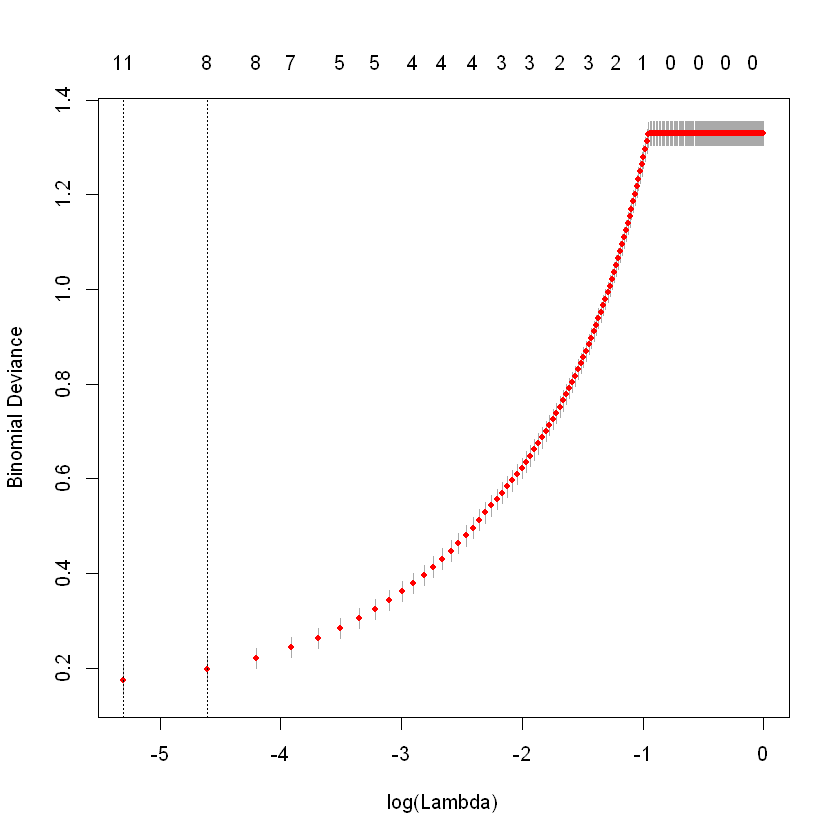

In [22]:
lassoFit = cv.glmnet(x,y, family = 'binomial', lambda = setLambda, type.measure='deviance', nfolds = 10, alpha = 1)
plot(lassoFit)

In [23]:
coef(lassoFit)

31 x 1 sparse Matrix of class "dgCMatrix"
                                   1
(Intercept)             -22.72149136
radius_mean               .         
texture_mean              0.06919164
perimeter_mean            .         
area_mean                 .         
smoothness_mean           .         
compactness_mean          .         
concavity_mean            .         
concave.points_mean      12.91834967
symmetry_mean             .         
fractal_dimension_mean    .         
radius_se                 1.67386647
texture_se                .         
perimeter_se              .         
area_se                   .         
smoothness_se             .         
compactness_se            .         
concavity_se              .         
concave.points_se         .         
symmetry_se               .         
fractal_dimension_se      .         
radius_worst              0.66633742
texture_worst             0.10092208
perimeter_worst           .         
area_worst                .      

Many variables were removed. This highlights the usefulness of this method as a variable selection method as well.

In [24]:
lassoFit$lamba.min

lassoFit$lambda.1se

NULL

[1] 0.01

In [25]:
#Use the y_test and x_test from last time, but change the pihat

pihat_2 = predict(object = lassoFit, type='response', newx = x_test)

Setting levels: control = FALSE, case = TRUE
Warning message in roc.default(response = ylogical, predictor = pihat_2):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."Setting direction: controls < cases


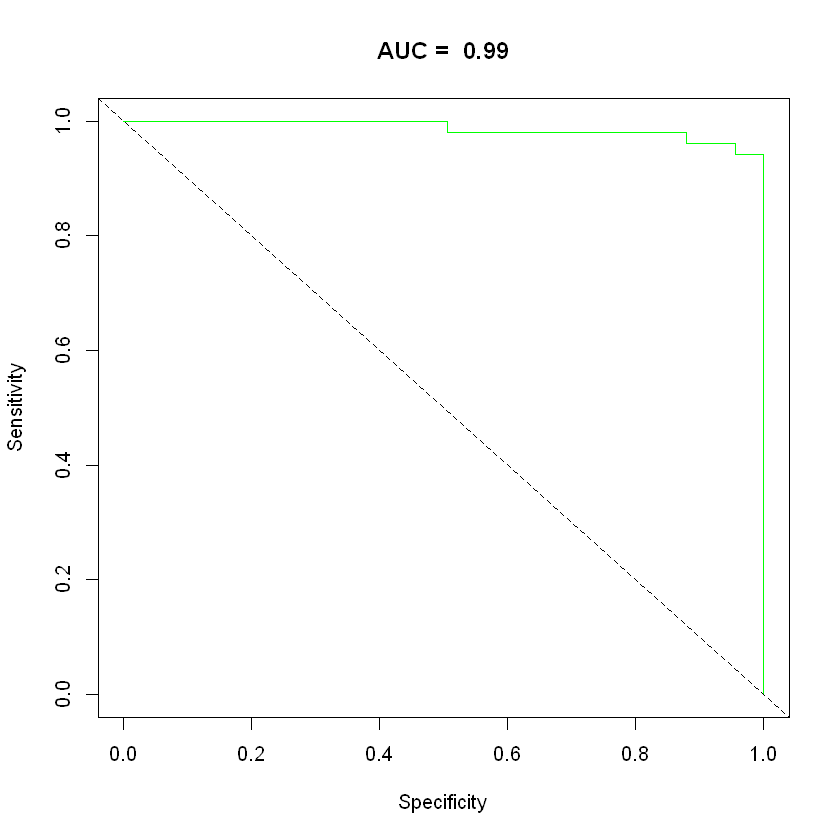

In [26]:
ylogical = (y_test == 'M')
ROC = roc(response = ylogical, predictor = pihat_2)
AUC = auc(ROC)

plot(x=ROC$specificities, y=ROC$sensitivities, 
    xlab = 'Specificity', ylab = 'Sensitivity', main = paste('AUC = ',round(AUC,2)), type='l',
    col = 'green')
abline(a=1,b=-1,lty="dashed") #the diagonal line

In [27]:
yhat = ifelse(pihat_2 > 0.5,'M','B')

In [28]:
table = table(yhat, y_test)
table #Lasso confusion matrix

    y_test
yhat  B  M
   B 91  4
   M  0 48

In [29]:
lassoAccuracy = (table[1,1] + table[2,2])/sum(table)

In [30]:
#FNR 
(table[1,2])/sum(table[,2]) #Slightly higher than ridge regression

[1] 0.07692308

In [31]:
lassoSens = table[2,2]/sum(table[,2])

### Classification Tree

Let us move on to the tree method. The sensitivities and total accuracy results will be compared at the end.

In [32]:
library(tree) #Essential package for this task

Warning message:
"package 'tree' was built under R version 3.6.3"

In [33]:
cancer_new = cancer[,!(names(cancer) %in% c('id'))]

#Renaming columns for increased visibility in the later diagrams
names(cancer_new)[2] = 'r_mean' #radius mean
names(cancer_new)[3] = 't_mean' #texture mean
names(cancer_new)[4] = 'p_mean' #perimeter mean
names(cancer_new)[5] = 'a_mean' #area mean
names(cancer_new)[6] = 's_mean' #smoothness mean
names(cancer_new)[7] = 'c_mean' #compactness_mean
names(cancer_new)[8] = 'con_mean' #concave mean
names(cancer_new)[9] = 'cpoints_mean' #concave points mean
names(cancer_new)[10] = 'sym_mean' #symmetry mean
names(cancer_new)[11] = 'f_dim_mean' #fractal dimension mean
names(cancer_new)[12] = 'r_se' #radius standard error
names(cancer_new)[13] = 't_se' #texture standard error
names(cancer_new)[14] = 'p_se' #perimeter standard error
names(cancer_new)[15] = 'a_se' #area standard error
names(cancer_new)[16] = 's_se' #smoothness standard error
names(cancer_new)[17] = 'c_se' #compactness standard error
names(cancer_new)[18] = 'con_se' #concavity standard error
names(cancer_new)[19] = 'c_points_se' #concavity points standard error
names(cancer_new)[20] = 'sym_se' #symmetry standard error
names(cancer_new)[21] = 'f_dim_se' #fractal dimension standard error
names(cancer_new)[22] = 'r_worst' #worst radius
names(cancer_new)[23] = 't_worst' #worst texture
names(cancer_new)[24] = 'p_worst' #worst perimeter
names(cancer_new)[25] = 'a_worst' #worst area
names(cancer_new)[26] = 's_worst' #worst smoothness
names(cancer_new)[27] = 'c_worst' #worst compactness
names(cancer_new)[28] = 'con_worst' #worst concavity
names(cancer_new)[29] = 'c_points_w' #worst concavity points
names(cancer_new)[30] = 'sym_worst' #worst symmetry
names(cancer_new)[31] = 'f_dim_w' #worst fractal dimension


head(cancer_new)
str(cancer_new)

diagnosis,r_mean,t_mean,p_mean,a_mean,s_mean,c_mean,con_mean,cpoints_mean,sym_mean,...,r_worst,t_worst,p_worst,a_worst,s_worst,c_worst,con_worst,c_points_w,sym_worst,f_dim_w
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


'data.frame':	569 obs. of  31 variables:
 $ diagnosis   : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ r_mean      : num  18 20.6 19.7 11.4 20.3 ...
 $ t_mean      : num  10.4 17.8 21.2 20.4 14.3 ...
 $ p_mean      : num  122.8 132.9 130 77.6 135.1 ...
 $ a_mean      : num  1001 1326 1203 386 1297 ...
 $ s_mean      : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ c_mean      : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ con_mean    : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ cpoints_mean: num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ sym_mean    : num  0.242 0.181 0.207 0.26 0.181 ...
 $ f_dim_mean  : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ r_se        : num  1.095 0.543 0.746 0.496 0.757 ...
 $ t_se        : num  0.905 0.734 0.787 1.156 0.781 ...
 $ p_se        : num  8.59 3.4 4.58 3.44 5.44 ...
 $ a_se        : num  153.4 74.1 94 27.2 94.4 ...
 $ s_se        : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ c_se        : num  0.049 0.0131 0.0401 0.0746 0.02

Notice how **diagnosis** is already established as a factor with 2 levels. Thus, no further manipulation needs to be done with functions such as dplyr's lapply() or as.factor function. Furthermore, no categorical variables exist either, so no further manipulation has to be done.

The training and testing sets, along with the diagrams, will be created next.

In [34]:
set.seed(7315) #Use the same random seed

training = sample(1:nrow(cancer_new), size = .75*nrow(cancer_new), replace = FALSE)
ttree = tree(diagnosis~., data = cancer_new, subset = training) #full tree
summary(ttree)


Classification tree:
tree(formula = diagnosis ~ ., data = cancer_new, subset = training)
Variables actually used in tree construction:
[1] "cpoints_mean" "r_worst"      "t_mean"       "s_mean"       "sym_se"      
[6] "p_worst"      "t_worst"     
Number of terminal nodes:  10 
Residual mean deviance:  0.09218 = 38.35 / 416 
Misclassification error rate: 0.02113 = 9 / 426 

The residual mean deviance appears to be quite small, as does the misclassification error rate. Also, few of the variables were used when compared to all 30. The plot shows the decision making process

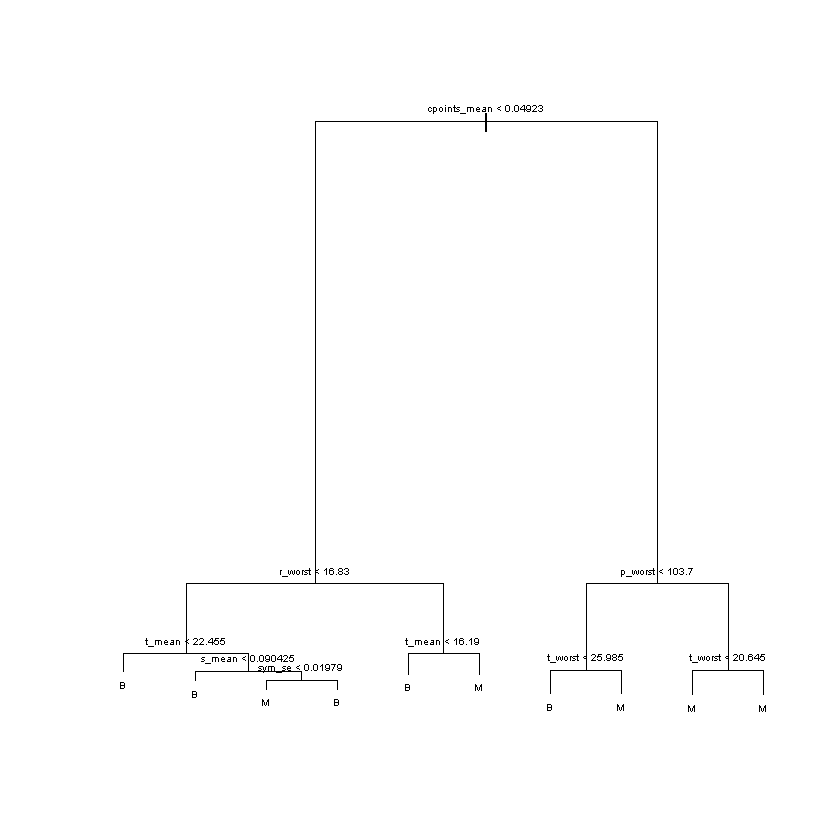

In [35]:
plot(ttree)
text(ttree, pretty=0, cex=.5)

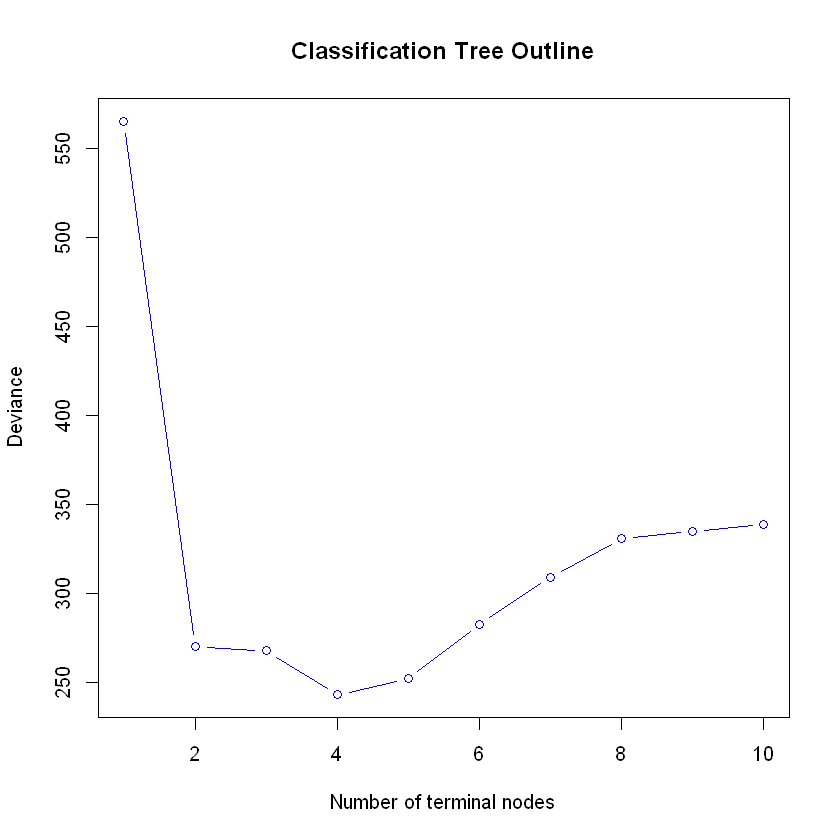

In [36]:
crossValTree = cv.tree(object=ttree) #seeing which number of nodes will give the best result for predictions
plot(crossValTree$size, crossValTree$dev, type = 'b',
    xlab = 'Number of terminal nodes', ylab = 'Deviance', main = 'Classification Tree Outline',
    col = 'blue')

The problem of overfitting may be very likely, so we need to prune the tree into a smaller subset of the full tree shown previously. The cross-validated graph above shows which number of terminal nodes will provide the best fit that isn't so overfitted like the full tree. In other words, this pruned tree will not be as complex of a model. Only three variables are included in the decision making process.

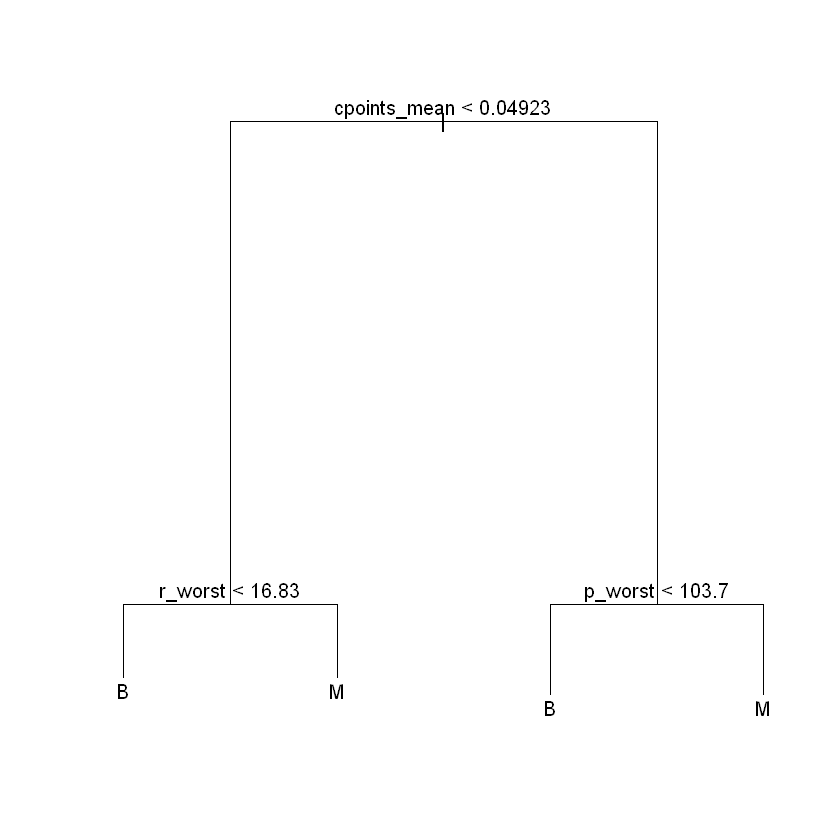

In [37]:
prunedTree = prune.tree(ttree, best=4)
plot(prunedTree)
text(prunedTree, pretty=0)

After creating the confusion matrix for both trees, we can analyze the results by implementing a dataframe.

In [38]:
yhat = predict(ttree, newdata = cancer_new[-training,]) #Full tree
ytest = cancer_new[-training,'diagnosis']
ypred = ifelse(test=(yhat[,2]>0),'M','B')

fullTable = table(ypred,ytest)
fullTable

     ytest
ypred  B  M
    B 83  3
    M  8 49

In [39]:
yhat = predict(prunedTree, newdata = cancer_new[-training,]) #Pruned tree
ytest = cancer_new[-training,'diagnosis']
ypred = ifelse(test=(yhat[,2]>0.02),'M','B') 
#since there are so few variables, the values don't converge to 0 or 1 like normal
#So, .02 is used instead of 0 since the matrix would not work if 0 is used

partialTable = table(ypred,ytest)
partialTable

     ytest
ypred  B  M
    B 79  2
    M 12 50

In [40]:
fullSens = fullTable[2,2] / sum(fullTable[,2])

pruneSens = partialTable[2,2] / sum(partialTable[,2])

fullAccuracy = (fullTable[1,1] + fullTable[2,2]) / sum(fullTable)

pruneAccuracy = (partialTable[1,1] + partialTable[2,2]) / sum(partialTable)

In [41]:
Sensitivity = c(fullSens, pruneSens ,ridgeSens ,lassoSens)
Accuracy = c(fullAccuracy, pruneAccuracy, ridgeAccuracy, lassoAccuracy)
Method = c('Full Tree', 'Pruned Tree', 'Ridge', 'Lasso')
df = data.frame(Method, Sensitivity, Accuracy)
df

Method,Sensitivity,Accuracy
Full Tree,0.9423077,0.9230769
Pruned Tree,0.9615385,0.9020979
Ridge,0.9423077,0.9790210
Lasso,0.9230769,0.9720280


## Conclusions

Either out of coincidence or because a relationship exists, it appears that the lasso method's sensitivity and the full tree's accuracy are the exact same value. The regression regularization methods both seem to provide very similar results for accuracy, with ridge regression having a slight edge. They outperformed the classification method greatly. This makes sense; regression methods are designed to minimize the error, and thus makes the most accurate predictions that it can. with a whopping 97% and 98% total accuracy rate, this provides some insight on what the preferred method should be when future testing is done for accuracy on different projects. The sensitivity for these methods was good as well, but it did not perform as well as the prune tree specifically. The pruned tree is the model we would opt for in a classification example since it's not only more parsimonious, but also lessens the issue of overfitting. The sensitivity is the highest for this, at 0.96, meaning that 96% of the time, given that the patient has the disease, the patient tests positive. This is exactly what doctors are trying to determine most times because they will want to correctly determine if a patient has a disease. On the other hand, if one tests positive even though they don't have the disease, it does not affect them as much since they will be getting unneeded help, whereas the other scenario is much more drastic since the person needs help but aren't receiving treatment. The pruned tree does have the worst accuracy out of all the methods, so it should be used when specifically wanting to obtain the highest sensitivity of a test. The full tree suffers from the problem of overfitting, but was included for the sake of comparison.

For future projects, it may be useful to try other methods, like bagging. Bagging is often a better method to use than classification. Classification is simple and easy to implement, but it comes at the cost of having slightly worse out-of-sample performance. This can be seen with the total accuracy being so low on those methods. Bagg or boost trees usually have much better and maybe even the best out-of-sample performance. 

Secondly, I believe it's worth looking into data with many more observations and much more spread out data. The data here is very accurate and constricted, but it may be useful to classify an object that is not so obvious. Usually, one can tell when something is wrong when examining the lump. When it grows to such a large size, chances are it is malignant. Using other data where the outcome is not so obvious may be more interesting to analyze.

Lastly, classifying more than just two factors can be a lot more useful for other data. Most classification datasets have many, many factors and categories. This one was simple with just two, but attempting to classify more variables sounds more challenging and more useful than what was done in this project.

I believe the results of this project are somewhat insightful, and going forward, depending on the goal of the project or the situation that is being looked into, I would be able to determine which method to use over the other more concretely than just picking an option that's suitable but not necessarily the best choice. 